In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('training_data.csv')

C:\Users\Nag Tella\AppData\Local\Temp\ipykernel_11652\377233653.py:1: DtypeWarning: Columns (6,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('training_data.csv')


In [3]:
df

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424426,381713000,Standard,6,Direct Billed to Insured,Pre-paid,N,42851,35,1999,PONT GR PRIX GT,...,NaN,2006,Y,Y,162.55,0,0.0,0.0,0.0,0.0
424427,381735600,Standard,6,Direct Billed to Insured,Pre-paid,N,43669,31,2000,NSSN QUEST,...,100-200,2006,Y,Y,117.13,0,0.0,0.0,0.0,0.0
424428,382057400,Standard,6,Direct Billed to Insured,Installment,N,42487,35,1997,PONT TRANSSPORT,...,100-400,2006,N,Y,118.21,0,0.0,0.0,0.0,0.0
424429,382162500,Preferred,6,Direct Billed to Insured,Installment,N,43360,31,1998,PONT SUNFIRE SE,...,40-100,2006,N,Y,103.93,0,0.0,0.0,0.0,0.0


In [4]:
print(df.shape)

(424431, 69)


In [5]:
df= df.drop_duplicates()

In [6]:
print(df.shape)

(424431, 69)


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424431 entries, 0 to 424430
Data columns (total 69 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PolicyNo                                  424431 non-null  int64  
 1   Policy_Company                            424431 non-null  object 
 2   Policy_Installment_Term                   424431 non-null  int64  
 3   Policy_Billing_Code                       424431 non-null  object 
 4   Policy_Method_Of_Payment                  424431 non-null  object 
 5   Policy_Reinstatement_Fee_Indicator        424431 non-null  object 
 6   Policy_Zip_Code_Garaging_Location         424431 non-null  object 
 7   Vehicle_Territory                         424431 non-null  int64  
 8   Vehicle_Make_Year                         424431 non-null  int64  
 9   Vehicle_Make_Description                  424431 non-null  object 
 10  Vehicle_Performance 

In [9]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [10]:
num_columns = df.select_dtypes(['int64','float64']).columns
df_num = df[num_columns]

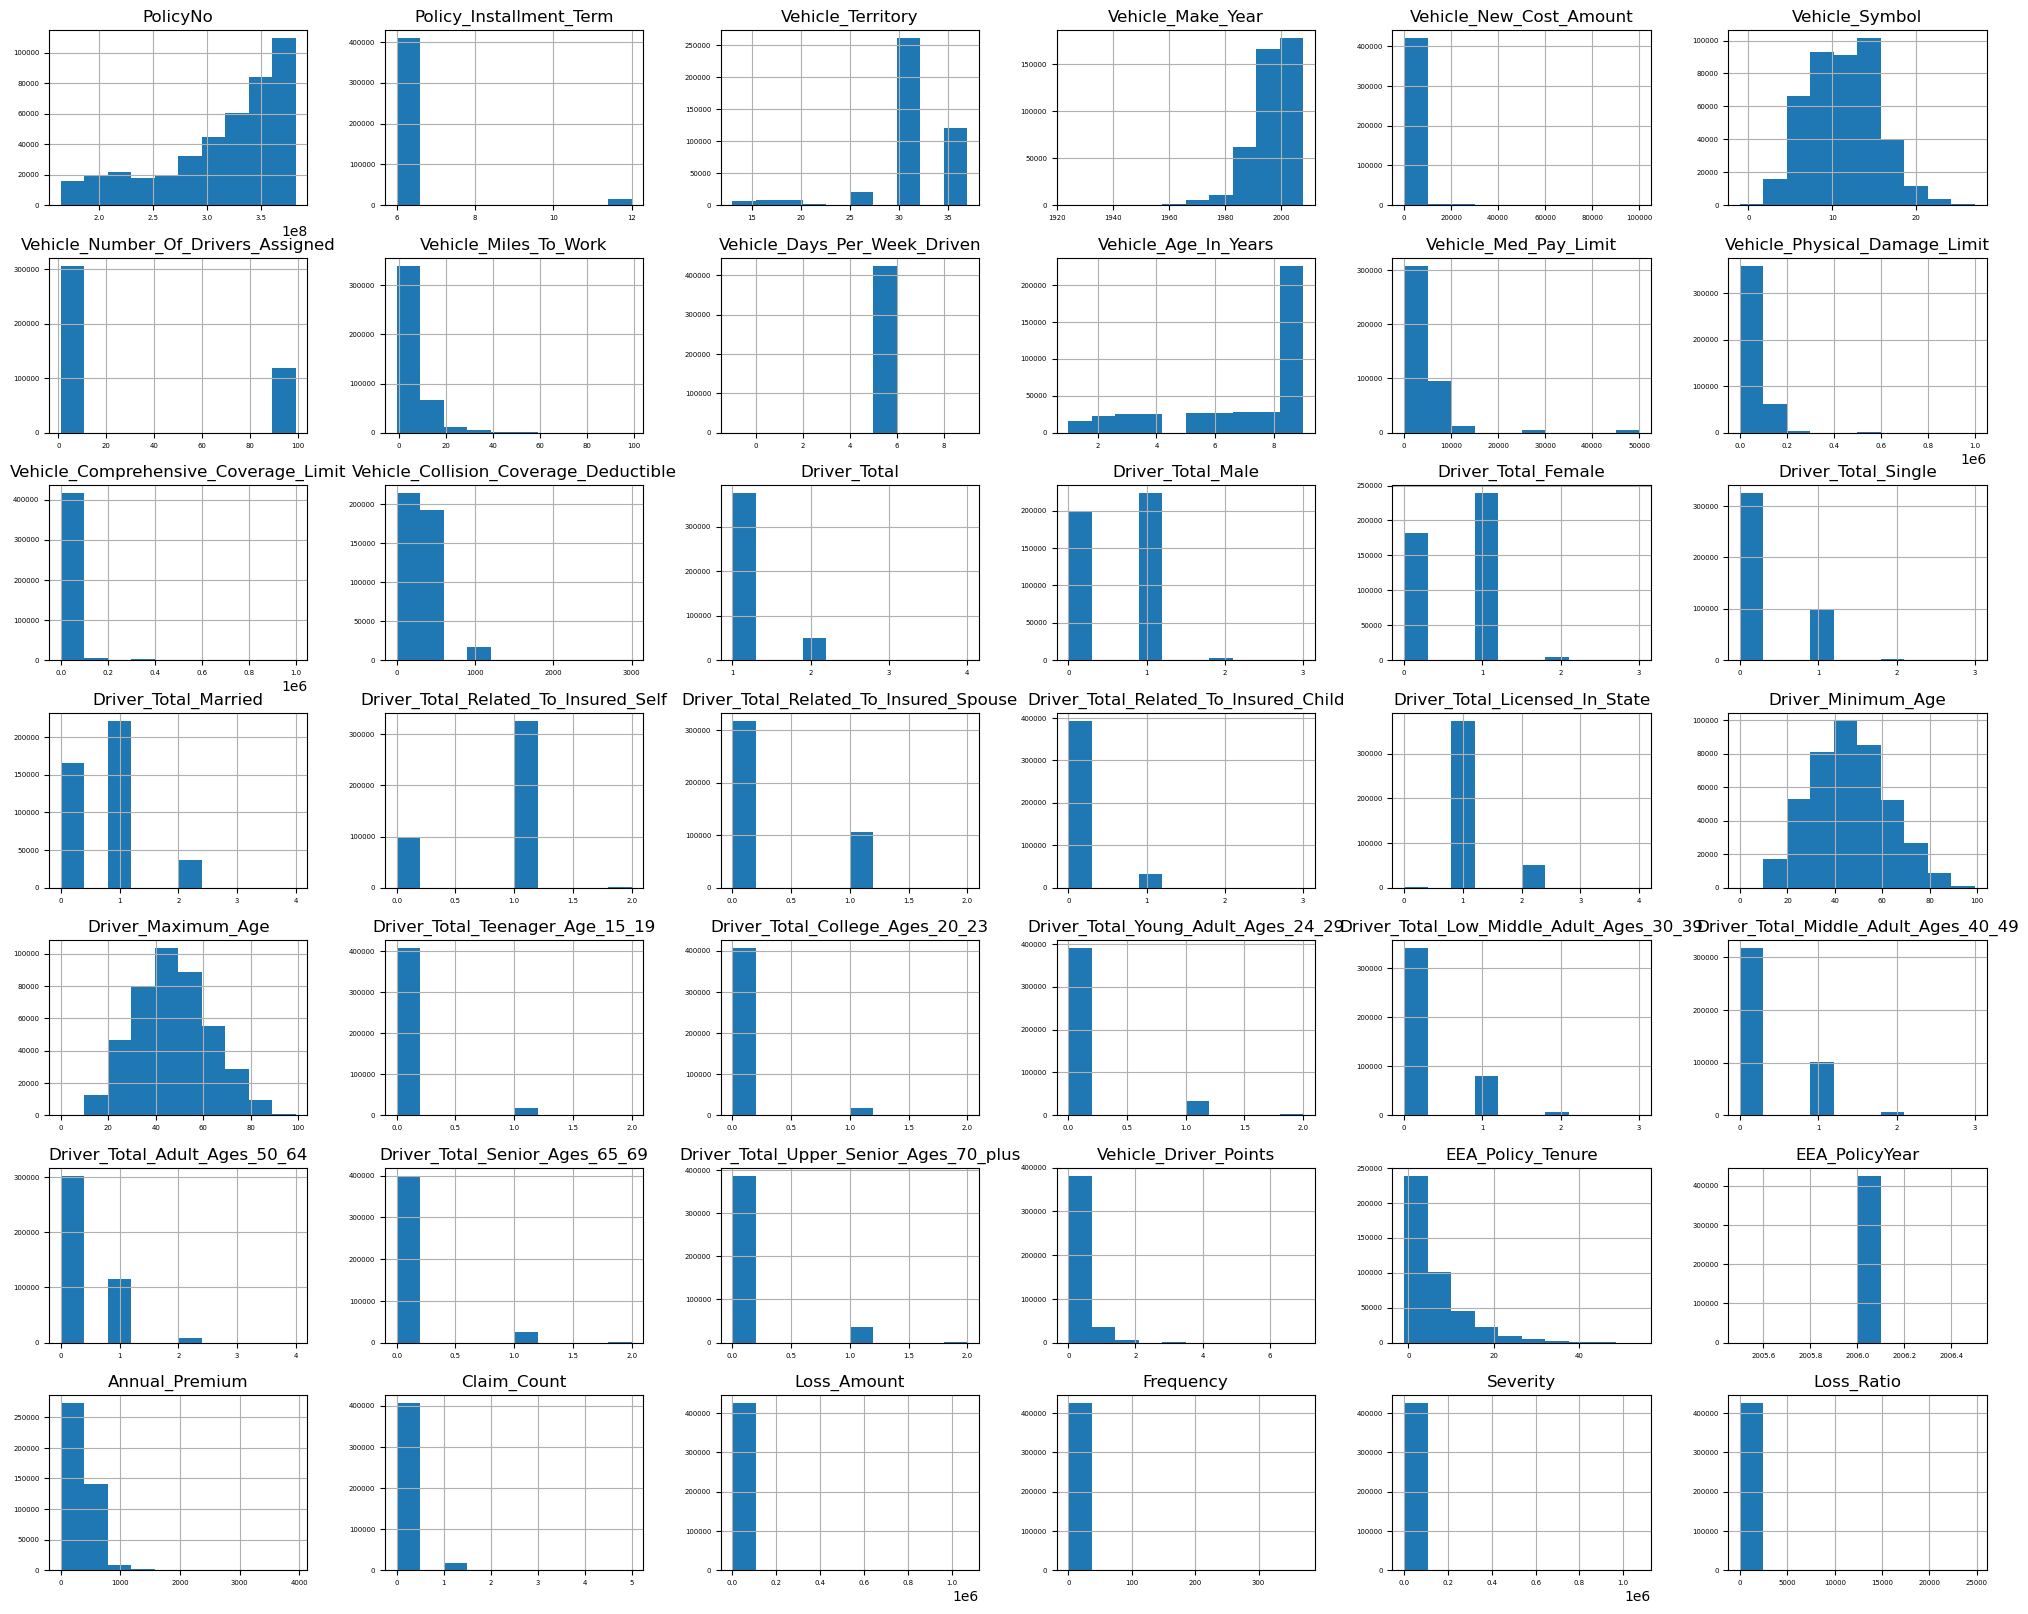

In [11]:
df_num.hist(figsize=(25, 20), bins=10, xlabelsize=5, ylabelsize=5);

In [12]:
# Find columns with null values
missing_columns = df.columns[df.isnull().any()]
print("Columns with null values:")
print(missing_columns)

Columns with null values:
Index(['Vehicle_Bodily_Injury_Limit', 'EEA_Prior_Bodily_Injury_Limit'], dtype='object')


In [13]:
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]
print(missing_cols)

Vehicle_Bodily_Injury_Limit      17326
EEA_Prior_Bodily_Injury_Limit    17326
dtype: int64


In [14]:
# # strip extra spaces from column values
df['Vehicle_Bodily_Injury_Limit'] = df['Vehicle_Bodily_Injury_Limit'].str.strip()

#Replace any null or missing values in the 'Vehicle_Bodily_Injury_Limit' column with the mode
mode_value = df['Vehicle_Bodily_Injury_Limit'].mode()[0]
df['Vehicle_Bodily_Injury_Limit'] = df['Vehicle_Bodily_Injury_Limit'].fillna(mode_value)

# Check unique values in 'Vehicle_Bodily _Injury_Limit' column
print(df['Vehicle_Bodily_Injury_Limit'])

0         250-500
1         100-300
2         250-500
3          50-100
4          50-100
           ...   
424426      25-50
424427    100-300
424428    250-500
424429     50-100
424430      25-50
Name: Vehicle_Bodily_Injury_Limit, Length: 424431, dtype: object


In [15]:
# strip extra spaces from column values
df['EEA_Prior_Bodily_Injury_Limit'] = df['EEA_Prior_Bodily_Injury_Limit'].str.strip()

#Replace any null or missing values in the 'EEA_Prior_Bodily_Injury_Limit' column with the mode
mode_value = df['EEA_Prior_Bodily_Injury_Limit'].mode()[0]
df['EEA_Prior_Bodily_Injury_Limit'] = df['EEA_Prior_Bodily_Injury_Limit'].fillna(mode_value)

# Check unique values in the 'EEA_Prior_Bodily_Injury_Limit' column
print(df['EEA_Prior_Bodily_Injury_Limit'])

0         100-400
1         100-200
2         100-400
3          40-100
4          40-100
           ...   
424426      20-50
424427    100-200
424428    100-400
424429     40-100
424430      20-50
Name: EEA_Prior_Bodily_Injury_Limit, Length: 424431, dtype: object


In [16]:
df['Vehicle_Number_Of_Drivers_Assigned'].value_counts()

1     295837
99    118544
2       9283
3        666
4         74
5         18
6          6
8          2
7          1
Name: Vehicle_Number_Of_Drivers_Assigned, dtype: int64